In [1]:
import os
import pandas as pd
from pandas import value_counts
import numpy as np
import datetime as dt
import time
import matplotlib.pyplot as plt
from matplotlib import test

import seaborn as sns
from sklearn.model_selection import train_test_split, validation_curve
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score , classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
import collections

In [2]:
df_bc = pd.read_csv("C:\\Maestria Gaby\\Materia2\\PROYECTO FINAL\\Dataset\\wdbc.data")
#df_bc.info()
df_bc.head()

headerList = ['id','diagnosis','radius_mean','texture_mean','perimeter_mean','area_mean','smoothness_mean','compactness_mean','concavity_mean','concave points_mean','symmetry_mean','fractal_dimension_mean','radius_se','texture_se','perimeter_se','area_se','smoothness_se','compactness_se','concavity_se','concave points_se', 'symmetry_se','fractal_dimension_se','radius_worst','texture_worst','perimeter_worst','area_worst','smoothness_worst','compactness_worst','concavity_worst','concave points_worst','symmetry_worst','fractal_dimension_worst']
df_bc.to_csv("wdbc2.csv", header=headerList, index=False)

df_bc2 = pd.read_csv("wdbc2.csv")
#El archivo con el cual trabajaré se llamará df_bc2
print('\nArchivo modificado:')
print(df_bc2)


Archivo modificado:
           id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842517         M        20.57         17.77          132.90     1326.0   
1    84300903         M        19.69         21.25          130.00     1203.0   
2    84348301         M        11.42         20.38           77.58      386.1   
3    84358402         M        20.29         14.34          135.10     1297.0   
4      843786         M        12.45         15.70           82.57      477.1   
..        ...       ...          ...           ...             ...        ...   
563    926424         M        21.56         22.39          142.00     1479.0   
564    926682         M        20.13         28.25          131.20     1261.0   
565    926954         M        16.60         28.08          108.30      858.1   
566    927241         M        20.60         29.33          140.10     1265.0   
567     92751         B         7.76         24.54           47.92      181.0   

     s

In [3]:
#Compruebo que se almacenaron de manera correcta las cabeceras que agregué
df_bc2.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [4]:
#Visualizo mis registros con el tipo de dato
df_bc2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568 entries, 0 to 567
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       568 non-null    int64  
 1   diagnosis                568 non-null    object 
 2   radius_mean              568 non-null    float64
 3   texture_mean             568 non-null    float64
 4   perimeter_mean           568 non-null    float64
 5   area_mean                568 non-null    float64
 6   smoothness_mean          568 non-null    float64
 7   compactness_mean         568 non-null    float64
 8   concavity_mean           568 non-null    float64
 9   concave points_mean      568 non-null    float64
 10  symmetry_mean            568 non-null    float64
 11  fractal_dimension_mean   568 non-null    float64
 12  radius_se                568 non-null    float64
 13  texture_se               568 non-null    float64
 14  perimeter_se             5

In [5]:
#Verifico si existen valores nulos en mi datset
df_bc2.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [6]:
#Durante mi investigación y tras leer y leer vi que sugerían eliminar la columna que contiene el id ya que es sólo un índice
#por lo tanto no aporta a la predicción
df_bc2 = df_bc2.drop(["id"], axis=1)

In [7]:
#Confirmo que se eliminó la columna id
df_bc2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568 entries, 0 to 567
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                568 non-null    object 
 1   radius_mean              568 non-null    float64
 2   texture_mean             568 non-null    float64
 3   perimeter_mean           568 non-null    float64
 4   area_mean                568 non-null    float64
 5   smoothness_mean          568 non-null    float64
 6   compactness_mean         568 non-null    float64
 7   concavity_mean           568 non-null    float64
 8   concave points_mean      568 non-null    float64
 9   symmetry_mean            568 non-null    float64
 10  fractal_dimension_mean   568 non-null    float64
 11  radius_se                568 non-null    float64
 12  texture_se               568 non-null    float64
 13  perimeter_se             568 non-null    float64
 14  area_se                  5

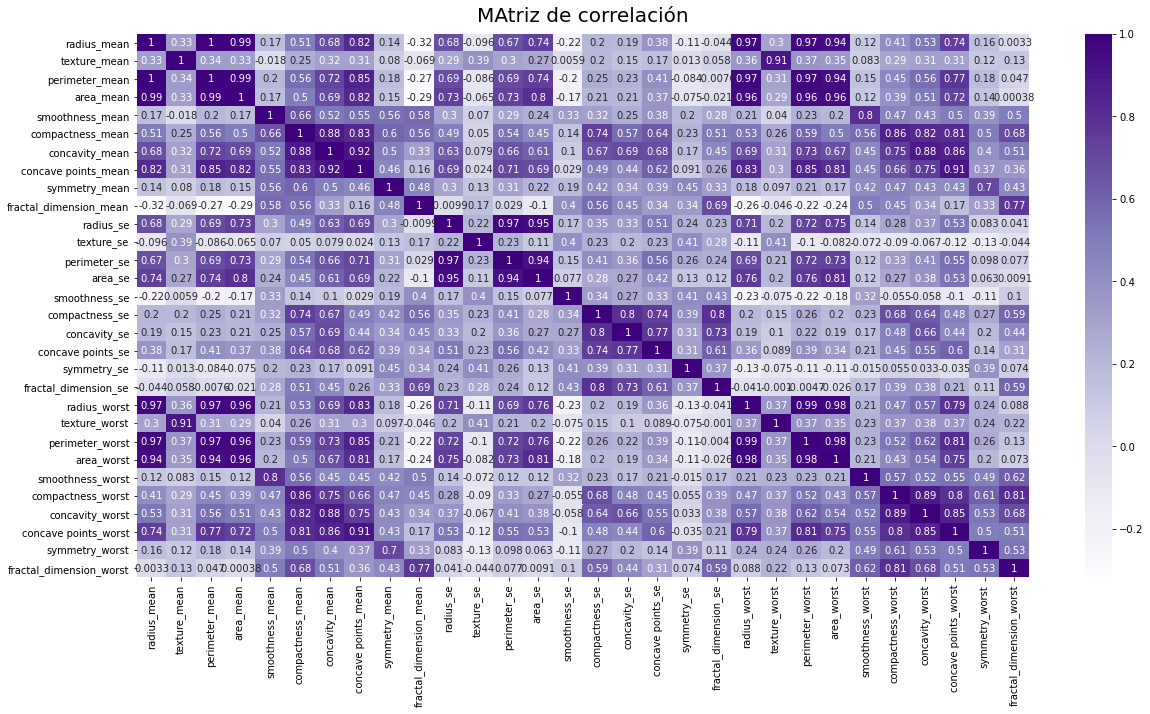

In [8]:
#Muestro una matriz de correlación para identificar las variables que son de importancia y se relacionan entre sí
plt.figure(figsize=(20,10))
heatmap = sns.heatmap(df_bc2.corr(), cmap='Purples',annot=True)
heatmap.set_title('MAtriz de correlación', fontdict={'fontsize':20}, pad=12);

In [9]:
#Miro cuantos casos de cáncer tengo por tipo: B (Beningo) - M (Maligno)
df_bc2.diagnosis.value_counts()

B    357
M    211
Name: diagnosis, dtype: int64

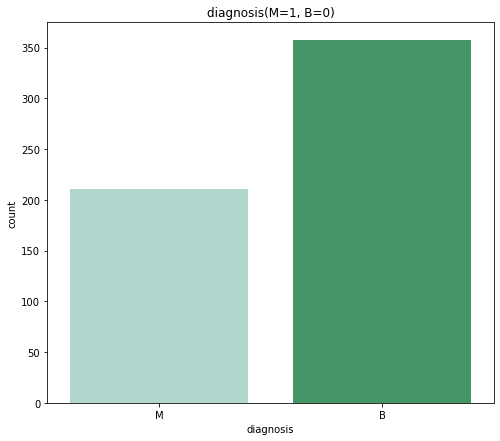

In [10]:
#Visualizamos la información del campo diagnosis
plt.figure(figsize = (8,7))
sns.countplot(x="diagnosis", data=df_bc2, palette='BuGn')
plt.title("diagnosis(M=1, B=0)")
plt.show()

In [11]:
#Mi variable predictoria es de tipo objeto(string), por lo cual debo transformarla a numérica
from sklearn.preprocessing import LabelEncoder
nume = LabelEncoder()

df_bc2['diagnosis'] = nume.fit_transform(df_bc2['diagnosis'])

In [12]:
#Compruebo que mi variable DIAGNOSIS ahora es de tipo int
df_bc2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568 entries, 0 to 567
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                568 non-null    int32  
 1   radius_mean              568 non-null    float64
 2   texture_mean             568 non-null    float64
 3   perimeter_mean           568 non-null    float64
 4   area_mean                568 non-null    float64
 5   smoothness_mean          568 non-null    float64
 6   compactness_mean         568 non-null    float64
 7   concavity_mean           568 non-null    float64
 8   concave points_mean      568 non-null    float64
 9   symmetry_mean            568 non-null    float64
 10  fractal_dimension_mean   568 non-null    float64
 11  radius_se                568 non-null    float64
 12  texture_se               568 non-null    float64
 13  perimeter_se             568 non-null    float64
 14  area_se                  5

In [13]:
#Al tener 32 columnas necesitamos realizar un análisis de componentes principales, porque al ser muy grande el dataset
#debemos obtener una muestra significativa de variables conservando la informacion

#Estandarizo mi muestra
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df_bc2)
scaled_bc2 = scaler.transform(df_bc2)

In [14]:
#le digo que me de 2 componentes y me entrene a mi variable estandarizada
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(scaled_bc2)
x_pca = pca.transform(scaled_bc2)

In [15]:
scaled_bc2.shape, x_pca.shape

((568, 31), (568, 2))

In [16]:
pca_df_b2 = pd.DataFrame(data=x_pca, columns = ['componente1', 'componente 2'])
pca_df_b2

,componente1,componente 2
0,2.684537,-3.779586
1,5.926607,-0.981522
2,7.125423,10.378576
3,4.155242,-1.903693
4,2.575146,3.912104
...,...,...
563,6.644159,-3.446241
564,4.078869,-3.539877
565,1.571172,-1.943752
566,10.457971,1.914280


In [17]:
#Divido los datos en etiquetas
x=df_bc2.drop('diagnosis', axis=1)
y=df_bc2['diagnosis']

In [18]:
#Compruebo el número de columnas que tengo en x
len(x.columns)

30

In [19]:
#Preparo y divido mis datos para train y test
from sklearn.model_selection import train_test_split

trainX, testX, trainY, testY = train_test_split(x, y, test_size = 0.3, random_state=42)


In [20]:
# estoy estandarizando mis variables de train y test
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
trainX = ss.fit_transform(trainX)
testX = ss.fit_transform(testX)



In [21]:
#USO DE MODELOS PARA MI PREDICCIÓN

In [22]:
#Modelo1: SGDClassifier
clf = SGDClassifier(loss="log")
clf.fit(trainX, trainY)

SGDClassifier(loss='log')

In [23]:
y_pred = clf.predict(testX)

print('Accuracy: {:.2f}'.format(accuracy_score(testY, y_pred)))

Accuracy: 0.97


In [24]:
from sklearn.metrics import confusion_matrix
confusion_matrix(testY,y_pred)

array([[102,   1],
       [  4,  64]], dtype=int64)

In [25]:
#Modelo2: RandomForest
clf = RandomForestClassifier(max_depth=15)
clf.fit(trainX, trainY)


RandomForestClassifier(max_depth=15)

In [26]:
y_pred = clf.predict(testX)

print('Accuracy: {:.2f}'.format(accuracy_score(testY, y_pred)))

Accuracy: 0.95


In [27]:
confusion_matrix(testY, y_pred)

array([[102,   1],
       [  8,  60]], dtype=int64)

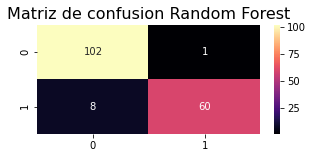

In [28]:
from sklearn.metrics import confusion_matrix, classification_report

plt.figure(figsize = (5,2))
plt.title("Matriz de confusion Random Forest", fontsize = 16)
sns.heatmap(confusion_matrix(testY, y_pred), annot= True, cmap = 'magma', fmt='.0f')   
plt.show()

In [29]:
#Modelo3: Kneighbors -- Encontré un código parecido al que conocemos para obtener la predicción con el modelo de kneighbors,
#utilicé este porque me muestra el num de vecinos y precisiones obtenidos al entrenar mis datos por 4 veces
resultNeig_accur = {}
for i in range(1,5):
          knn = KNeighborsClassifier(n_neighbors= i)
          knn.fit(trainX, trainY)
          Y_knn = knn.predict(testX)
          score = accuracy_score(Y_knn, testY)
          resultNeig_accur[i] = score

In [30]:
resultNeig_accur

{1: 0.9532163742690059,
 2: 0.9473684210526315,
 3: 0.9649122807017544,
 4: 0.9590643274853801}

In [31]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(trainX, trainY)

y_predict = knn.predict(testX)  

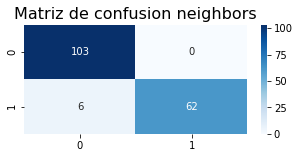

In [32]:
from sklearn.metrics import confusion_matrix, classification_report

plt.figure(figsize = (5,2))
plt.title("Matriz de confusion neighbors", fontsize=16)
sns.heatmap(confusion_matrix(testY, y_predict), annot = True, cmap = 'Blues', fmt = '.0f')
plt.show();

In [33]:
#Mi accuracy final en mi modelo de Neighbors
KNN_acc = accuracy_score(testY, y_predict)
print(KNN_acc)

0.9649122807017544


In [34]:
#Modelo4: SUPPORT VECTOR MACHINE  --Investigando encontré este modelo que me parece tiene el mejor accuracy para este caso
svc = SVC()

svc.fit(trainX, trainY)

y_predict= svc.predict(testX)

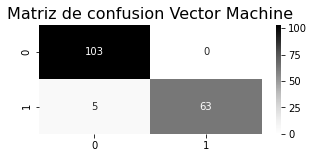

In [35]:
plt.figure(figsize= (5,2)) 
plt.title("Matriz de confusion Vector Machine", fontsize=16) 
sns.heatmap(confusion_matrix(testY, y_predict), annot = True, cmap='Greys', fmt='.0f')    
plt.show()

In [36]:
svc_accur= accuracy_score(testY, y_predict)
print(svc_accur)

0.9707602339181286
